# **Project 2: Predicting Diabetes Diagnoses**

Emilie He, Bojun Li

Video Link: https://youtu.be/49jLTieISus

## Key Takeaways
After training Logistic Regression, Random Forests, and K-NN models on our diabetes dataset, we discovered the following:


*   Generally, the models succeed at ruling out diabetes. Our Logistic Regression model achieved a Negative Predictive Value of approximately 99%, meaning whenever it predicts "No Diabetes," our prediction is most likely correct.  
*   Blood-glucose levels and HbA1c are key indicators of diabetes. Our Logistic Regression model calculated the importance of HbA1c levels at 2.289619 and importance of blood-glucose levels at 1.281442
*   With blood-glucose levels and HbA1c levels dropped as variables, BMI and age are the next most important factors. BMI's importance across the models was at least 0.5 with age trailing behind, but still more important than other features.
*   Across all of our models, gender has consistently had low importance in comparison to the rest of the features

## Background
Recently, the International Diabetes Federation (IDF) released a statistic that globally, approximately one in nine adults (total 589 million) are living with diabetes, with an estimated 252 million who are unaware of their condition. The United States has also followed this trend, seeing increases in cases of diagnosed and undiagnosed diabetes. This peaked our interest in the topic as well as the medical field in general.

With the increasing amount of available healthcare data (including a surprising amount of freely available anonymized data), interest in applying machine learning techniques to diagnostic and treatment approaches has risen. Our motivation in this project is to investigate the potential for using machine learning techniques to build a machine learning model that can accurately predict whether an individual has diabetes based on commonly available features. While this is just a proof of concept, in the future more advanced models could help doctors and patients provide and receive better quality care respectively.

Source: https://finance.yahoo.com/news/over-250-million-people-worldwide-090000437.html

## Dataset
Our dataset contains anonymous medical records of patients from electronic health records (EHRs) from various healthcare providers. The dataset contains a CSV file, containing the following columns:

* gender: somewhat erroneously named, refers to the biological sex of the individual
* age: age in years of the individual
* hypertension: boolean denoting whether the individual has hyptension (a condition where the blood pressure in their arteries is persistently elevated)
* heart_disease: boolean denoting whether the individual has heart disease
* smoking_history: variable that represents the individuals smoking history (includes "never", "former", "current", "not current", and "no info")
* bmi: BMI of the individual
* HbA1c_level: Hemoglobin A1c level is a measure of the individual's average * blood sugar level over the past 2-3 months
* blood_glucose_level: amount of glucose in the individual's bloodstream at a given time

and

* diabetes: the target boolean variable being predicted; 1 indicates the presence of diabetes and 0 indicates the opposite

## Project Domain
Type of Learning
We used supervised learning and more specifically, binary classification; the dataset contains a target boolean variable (whether a patient has diabetes or not), which makes supervised learning appropriate for this task. The broader domain of our project is healthcare and healthcare informatics.

The task (T) in our domain is a binary classification task. Essentially, the task is, using the given features, classify people into "having diabetes" and "not having diabetes".
The experience (E) are the features we outlined above: gender, age, hypertension, heart disease, smoking history, BMI, and blood glucose levels.
The performance metric (P) that we plan to use is accuracy: more specifically the percentage of individuals in the test dataset that the model we train correctly classifies.Additionally, we'll provide a confusion matrix that provides a visual summary of the correct and incorrect predictions.

## Setup

In [1]:
# Step 1: Import libraries and mount Drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
drive_path = '/content/drive/MyDrive'
print("Listing contents of MyDrive:")
print(os.listdir(drive_path))

Listing contents of MyDrive:
['Copy of 76101: A: 9 1 Class Notes.gdoc', '76101 HW 1.gdoc', '80101 pset 1 fatalism (1).mup', '80101 pset 1 fatalism.mup', 'Set 1 (2 in 1).mup', '76101 Professional Emails.gdoc', 'Copy of 76101:  9 10 Agenda .gdoc', 'Livingstone Oleschuk outline.gdoc', 'levy-deafness-culture-choice (1).gdoc', 'levy-deafness-culture-choice.gdoc', 'Mini-3 80101.mup', 'Feedback for Jordan.gdoc', 'Democracy Short Essay.gdoc', 'Bojun Democracy Essay.gdoc', 'M Night.gdoc', 'Copy of Team activity 1.gdoc', 'Team 6-Democracy and Data', 'CollaborativeU Team activity 1.gdoc', 'HW 10 11.gdoc', '10 13 HW.gdoc', 'Bojun mini peer review Moises.gdoc', 'Peer Review Ransher.gdoc', 'Ransher Annotations.gdoc', 'Untitled document (14).gdoc', 'Contribution Sample 3.gdoc', 'Information Systems.gdraw', 'Sample Contribution 2_ Conceptual.gdoc', 'BojunLi_GapAnalysis.gdoc', 'Sources.gdoc', 'Untitled document (13).gdoc', 'Group GMCNJ_ Meeting Notes 11_8.pdf', 'Group GMCNJ_ Meeting Notes 11_8.gdoc', '

**Note:** The `csv_folder_path` requires a bit of adjustment sometimes; on some devices, you need a trailing space after 67-364 Project 2 (ie "/67-364 Project 2 ") while in others you don't. If you encounter a no such directory error please try it both ways.

In [3]:
csv_folder_path = "/content/drive/MyDrive/67-364 Project 2 " # need the trailing space to run on some devices but not others
os.chdir(csv_folder_path)

In [4]:
# Step 2: Load dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')  # Make sure the file is in the same directory or provide the full path
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Basic Data Cleansing

Here, we followed the data cleansing steps provided by Professor Raja. We checked for missing values, sparse columns, and duplicates, and handled them as we needed.

In [5]:
# Step 3: Basic Data Cleansing
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\n")

# Check for sparse colums
print("Sparse columns:")
print(list(df.columns[df.nunique()/len(df) < 0.01]))
print("\n")

# Check for duplicates
dupes = df.duplicated()
dupes_df = df[dupes]
total = dupes.sum()
print(f"Total dupes: {total}")

no_dupes_df = df.copy()
no_dupes_df.drop_duplicates(inplace = True)


Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Sparse columns:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


Total dupes: 3854


We also checked for outliers, and we found outliers in BMI, HbA1c levels, and blood-glucose levels. However, we decided not to remove these outliers because in our case, these outliers could signal a relationship between testing positive or negative for diabetes.


Analyzing outliers in age:
Number of outliers: 0 (0.00%)


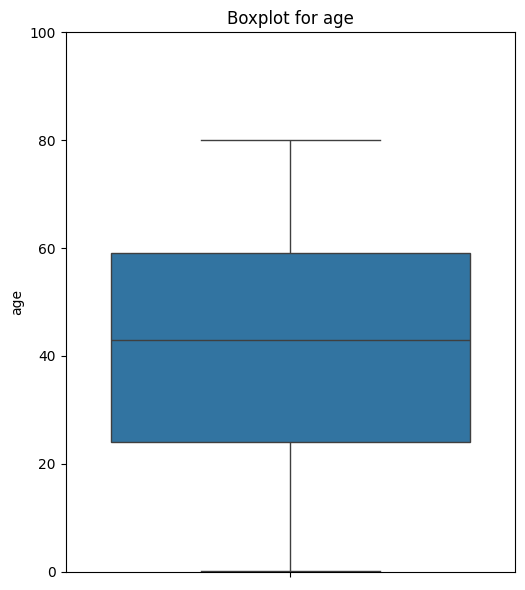


Analyzing outliers in bmi:
Number of outliers: 5354 (5.57%)
Outlier values sample: [39.84, 41.78, 39.77, 40.12, 44.8]


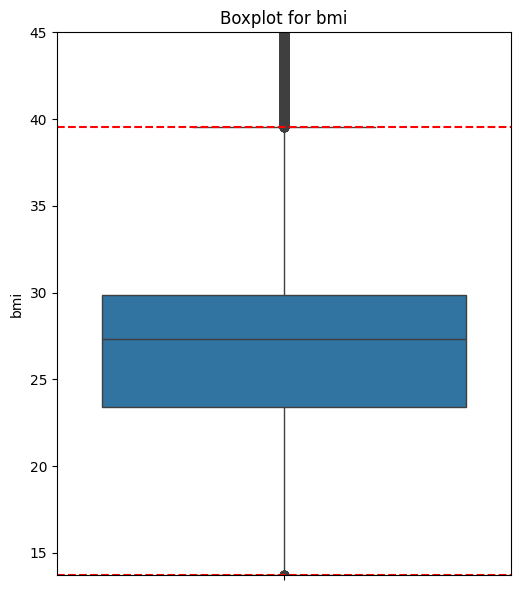


Analyzing outliers in HbA1c_level:
Number of outliers: 1312 (1.36%)
Outlier values sample: [8.8, 9.0, 8.8, 8.8, 8.8]


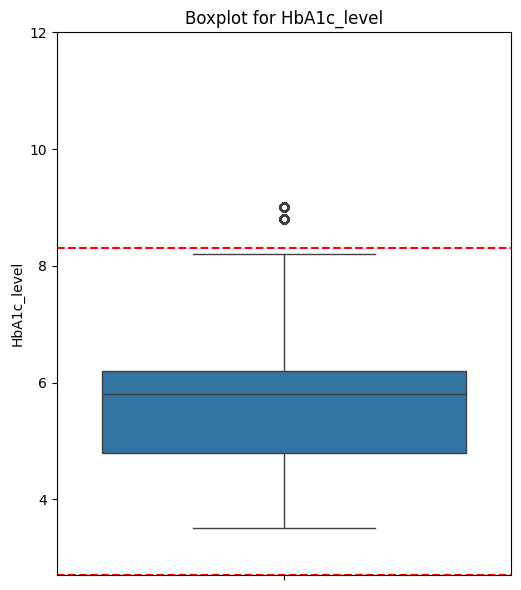


Analyzing outliers in blood_glucose_level:
Number of outliers: 2031 (2.11%)
Outlier values sample: [280, 280, 300, 260, 280]


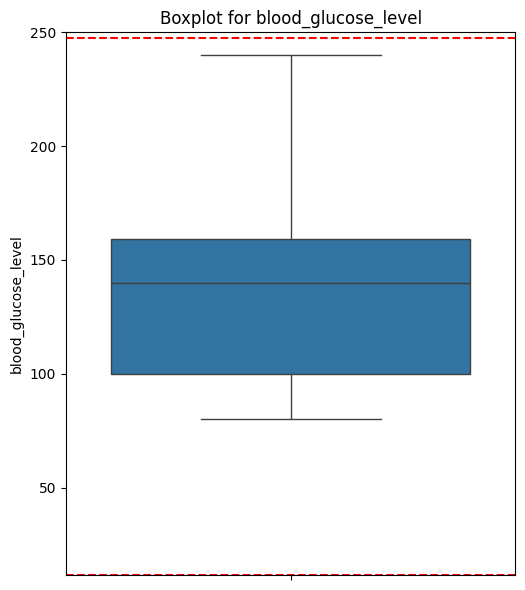

In [6]:
# Check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    if col == 'HbA1c_level':
        plot_min = 0 if lower_bound < 0 else 3 if lower_bound > 3 else lower_bound
        plot_max = 15 if upper_bound > 15 else 12 if upper_bound < 12 else upper_bound
    elif col == 'bmi':
        plot_min = 0 if lower_bound < 0 else 15 if lower_bound > 15 else lower_bound
        plot_max = 60 if upper_bound > 60 else 45 if upper_bound < 45 else upper_bound
    elif col == 'blood_glucose_level':
        plot_min = 0 if lower_bound < 0 else 60 if lower_bound > 60 else lower_bound
        plot_max = 300 if upper_bound > 300 else 250 if upper_bound < 250 else upper_bound
    elif col == 'age':
        plot_min = 0
        plot_max = 100

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers, lower_bound, upper_bound, plot_min, plot_max

def plot_outliers(df, col, lower, upper, plt_min, plt_max):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.axhline(y=lower, color='r', linestyle='--')
    plt.axhline(y=upper, color='r', linestyle='--')
    plt.ylim(plt_min, plt_max)

    plt.title(f'Boxplot for {col}')

    plt.tight_layout()
    plt.show()

continuous_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

outlier_summary = {}
for col in continuous_cols:
    print(f"\nAnalyzing outliers in {col}:")
    outliers, lower, upper, plt_min, plt_max = find_outliers(no_dupes_df, col)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(no_dupes_df)) * 100

    print(f"Number of outliers: {outlier_count} ({outlier_percent:.2f}%)")
    if outlier_count > 0:
      print(f"Outlier values sample: {outliers[col].sample(5).tolist()}")
    outlier_summary[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'outlier_count': outlier_count,
        'outlier_percent': outlier_percent
    }
    plot_outliers(no_dupes_df, col, lower, upper, plt_min, plt_max)


We then encoded our categorical variables and standardized our numerical variables. We also decided to create bins for age to better see the relationship between different age groups and diabetes. Finally, we split our dataset into a train dataset and test dataset. We followed a typical 80-20 split to do so.

In [7]:
# Step 4: Encode categorical variables
# Encode gender (assuming values like "Male", "Female", "Other")
no_dupes_df['gender'] = LabelEncoder().fit_transform(no_dupes_df['gender'])

# Encode smoking_history with one-hot encoding
no_dupes_df = pd.get_dummies(no_dupes_df, columns=['smoking_history'], drop_first=True)

In [8]:
# Step 5: Standardize numerical features
numeric_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level']
no_dupes_df[numeric_cols] = no_dupes_df[numeric_cols].fillna(df[numeric_cols].median())
scaler = StandardScaler()
no_dupes_df[numeric_cols] = scaler.fit_transform(no_dupes_df[numeric_cols])

In [9]:
# Step 6: Optional binning of age
# Create age groups (e.g., <30, 30-50, 50-70, >70)
print(no_dupes_df['age'].describe())
no_dupes_df['age_group'] = pd.cut(no_dupes_df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 125], labels=['[0,10)', '[10,20)', '[20,30)', '[30,40)', '[40,50)', '[50,60)', '[60,70)', '70+'], right=False)

# Optionally encode age group as well
no_dupes_df = pd.get_dummies(no_dupes_df, columns=['age_group'], drop_first=True)
no_dupes_df.head()

count    96146.000000
mean        41.794326
std         22.462948
min          0.080000
25%         24.000000
50%         43.000000
75%         59.000000
max         80.000000
Name: age, dtype: float64


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,"age_group_[10,20)","age_group_[20,30)","age_group_[30,40)","age_group_[40,50)","age_group_[50,60)","age_group_[60,70)",age_group_70+
0,0,80.0,0,1,-0.314947,0.994563,0.043554,0,False,False,False,True,False,False,False,False,False,False,False,True
1,0,54.0,0,0,-0.000216,0.994563,-1.423096,0,False,False,False,False,False,False,False,False,False,True,False,False
2,1,28.0,0,0,-0.000216,0.155970,0.483549,0,False,False,False,True,False,False,True,False,False,False,False,False
3,0,36.0,0,0,-0.572051,-0.496269,0.410216,0,True,False,False,False,False,False,False,True,False,False,False,False
4,1,76.0,1,1,-1.061141,-0.682623,0.410216,0,True,False,False,False,False,False,False,False,False,False,False,True


In [10]:
# Step 7: Train-test split
X = no_dupes_df.drop('diabetes', axis=1)
y = no_dupes_df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (76916, 19)
Test set shape: (19230, 19)


## Logistic Regression Definition and Training

Logistic regression is commonly used in binary classification problems such as the diabetes prediction task we are working on. We first trained using every feature given to us in the dataset, and then evaluate our results using a confusion matrix, ROC curve, and a list of each predictor's importance.

We then removed some features (our motivations are explained in the section where we removed them) and re-trained using the same procedure, and evaluated our results the same way. All of our takeaways for logistic regression are discussed in one place: at the end of all logistic regression and before we move onto other models.

### Logistic Regression on all variables

We first trained using all of the available features in the dataset.

When we analyzed the dataset, there were 17509 instances of the output variable being 0 and only 1721 instances of it being 1 (you can see this slightly later in the notebook just under the confusion matrix output); therefore, all our models that we trained from this point onward have class_weight='balanced' to handle this imbalance.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(19230,)
(19230,)


There are 17509 instances of the output variable being 0 and only 1721 instances of it being 1 (you can see this slightly later in the notebook just under the confusion matrix output); therefore, all our models have `class_weight='balanced'` to handle this imbalance.

Accuracy: 0.8867914716588664


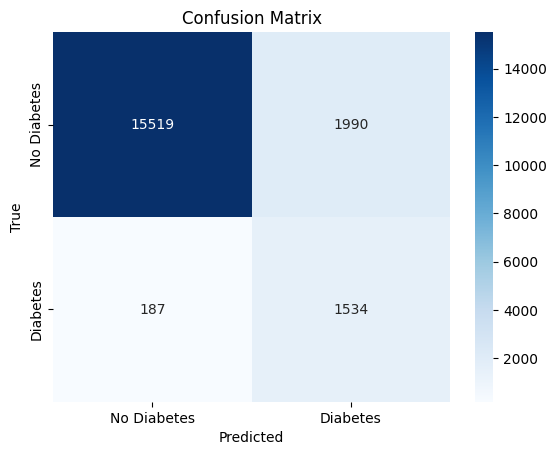

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     17509
           1       0.44      0.89      0.58      1721

    accuracy                           0.89     19230
   macro avg       0.71      0.89      0.76     19230
weighted avg       0.94      0.89      0.90     19230



In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

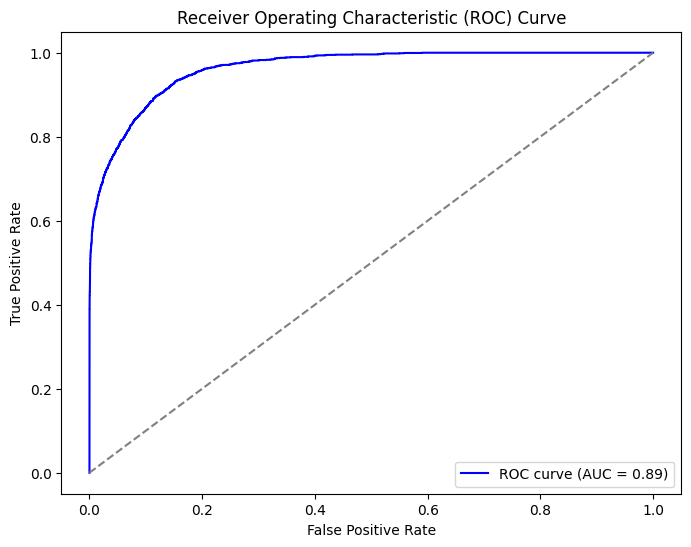

In [13]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [14]:
# Get the feature importance (coefficients)
coefficients = model.coef_[0]

# Create a DataFrame to view the feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})

# Sort the features by importance (absolute value of the coefficient)
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Display the top most important and least important features
print(feature_importance)

                        Feature  Importance  Absolute Importance
5                   HbA1c_level    2.289619             2.289619
6           blood_glucose_level    1.281442             1.281442
3                 heart_disease    0.803803             0.803803
2                  hypertension    0.787212             0.787212
4                           bmi    0.606281             0.606281
7       smoking_history_current    0.588880             0.588880
8          smoking_history_ever    0.546722             0.546722
9        smoking_history_former    0.518419             0.518419
10        smoking_history_never    0.438173             0.438173
11  smoking_history_not current    0.374409             0.374409
13            age_group_[20,30)   -0.340226             0.340226
0                        gender    0.282532             0.282532
12            age_group_[10,20)    0.161990             0.161990
14            age_group_[30,40)   -0.149965             0.149965
18                age_gro

### Logistic Regression without blood glucose levels and HbA1c levels

It seemed obvious to us that diabetes could effectively be predicted with blood glucose and HbA1c levels; we were curious how a logistic regression model would perform without these clear indicators. This has real-world implications: if a model can accurately predict diabetes when given no data taken from bloodwork, that increases the number of patients that can be diagnosed with diabetes.

In [15]:
# Train without blood glucose level just for curiosity

# drop the specific features from the dataset
X_filtered = X_train.drop(['HbA1c_level', 'blood_glucose_level'], axis=1)
print("Shape of X:", X_filtered.shape)
print("Shape of y_train:", y_train.shape)

model.fit(X_filtered, y_train)

# Recompute predictions and evaluation metrics
X_filtered_test = X_test.drop(['HbA1c_level', 'blood_glucose_level'], axis=1)
y_pred_new = model.predict(X_filtered_test)

Shape of X: (76916, 17)
Shape of y_train: (76916,)


Accuracy: 0.7105564222568903


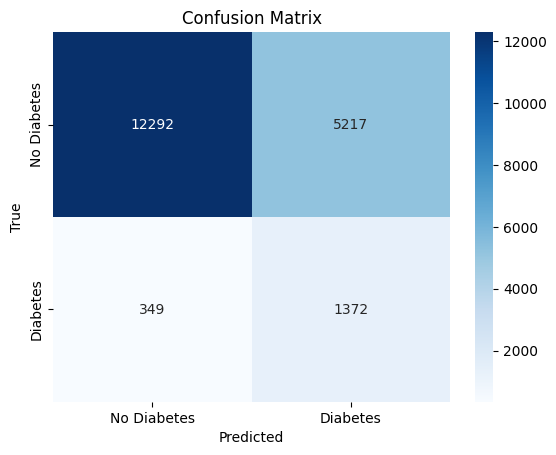

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.82     17509
           1       0.21      0.80      0.33      1721

    accuracy                           0.71     19230
   macro avg       0.59      0.75      0.57     19230
weighted avg       0.90      0.71      0.77     19230



In [16]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_new)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_new)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_new)
print("Classification Report:\n", class_report)

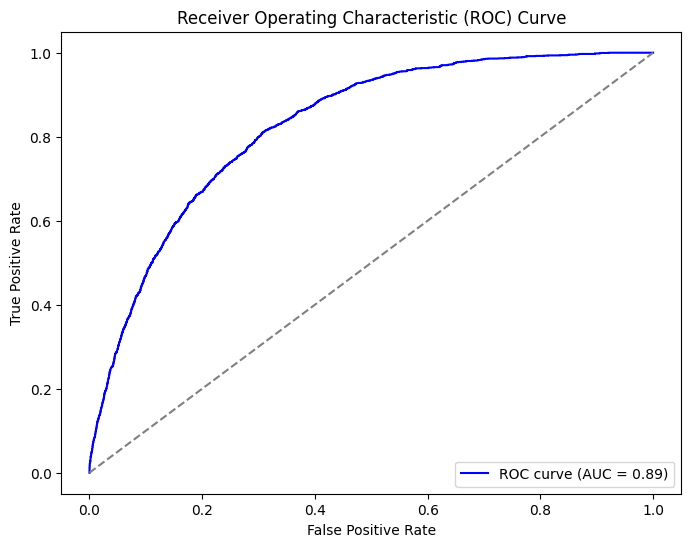

In [17]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_filtered_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [18]:
# Get the feature importance (coefficients)
coefficients = model.coef_[0]

# Create a DataFrame to view the feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns.drop(['HbA1c_level', 'blood_glucose_level']),
    'Importance': coefficients
})

# Sort the features by importance (absolute value of the coefficient)
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Display the top most important and least important features
print(feature_importance)

                        Feature  Importance  Absolute Importance
3                 heart_disease    0.844998             0.844998
2                  hypertension    0.826359             0.826359
5       smoking_history_current    0.671877             0.671877
4                           bmi    0.609758             0.609758
7        smoking_history_former    0.478585             0.478585
8         smoking_history_never    0.428641             0.428641
11            age_group_[20,30)   -0.428360             0.428360
6          smoking_history_ever    0.420940             0.420940
9   smoking_history_not current    0.407187             0.407187
0                        gender    0.298689             0.298689
12            age_group_[30,40)   -0.217112             0.217112
16                age_group_70+   -0.193197             0.193197
15            age_group_[60,70)    0.124765             0.124765
14            age_group_[50,60)    0.123218             0.123218
10            age_group_[

### Feature Importance Summary for Diabetes Prediction Model on Logistic Regression:
- Top Predictors:
  - HbA1c level and Blood Glucose level: unsurprisingly the strongest by far predictors
  - Heart Disease (0.844998), Smoking History (current, 0.671877), Hypertension (0.826359): Strong predictors of diabetes
  - BMI (0.609758): Significant predictor but slightly less strong

- Age Groups:
  - Age groups [20,30) (-0.428360), and [30,40) (-0.217112): Young adults appear less likely to have diabetes
  - Age group [60,70) (0.240563): Older individuals show a higher likelihood of having diabetes
  - Age group [10,20) (0.110194): Youth and teenagers show a slightly higher likelihood of having diabetes, but the effect is not strong

- Smoking History:
  - Significant importance across all categories (current, former, never, not current), smoking status is a strong predictor of diabetes

- Gender (0.298689):
  - Relatively low importance

- Age (0.042090):
  - Age as a continuous variable has very low importance compared to binned age groups

### Key Takeaways:
The logistic regression model identified HbA1c level and blood glucose level as by far the most influential predictors of diabetes, aligning with clinical expectations. Among the other features, heart disease (importance: 0.845), hypertension (0.826), and current smoking history (0.672) also demonstrated strong associations with diabetes risk, while BMI (0.610) showed moderate predictive power. Age, when grouped into bins, revealed important patterns: individuals aged [60,70) exhibited an increased likelihood of diabetes (0.241), while younger age groups [20,30) and [30,40) showed negative associations (-0.428 and -0.217, respectively), indicating lower risk. Interestingly, age as a continuous variable had minimal importance (0.042), suggesting that categorical age groupings capture risk better. Smoking history, across all statuses, emerged as a consistently important factor. Gender showed limited predictive value (0.299), highlighting that it plays a relatively minor role in this model.

## Random Forest

Following logistic regression, we wanted to try more ML algorithms' performance on the data without blood glucose or HbA1c. Random forest was the next model: it is an ensemble learning method, used in classification problems. We wanted to use random forest because we believed that its generation of multiple decision trees and aggregation of their outputs would be effective at handling complex, non-linear relationships.

Similarly to with logistic regression, we first trained the model, then generate a confusion matrix, ROC curve, and list of predictors sorted by importance to evaluate its performance.

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model on the training data
rf_model.fit(X_filtered, y_train)

# Make predictions on the test data
rf_pred = rf_model.predict(X_filtered_test)

Accuracy: 0.8563182527301092


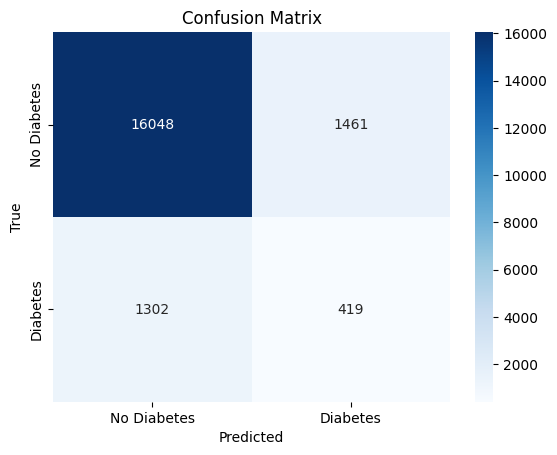

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     17509
           1       0.22      0.24      0.23      1721

    accuracy                           0.86     19230
   macro avg       0.57      0.58      0.58     19230
weighted avg       0.86      0.86      0.86     19230



In [20]:
# Accuracy
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, rf_pred)
print("Classification Report:\n", class_report)

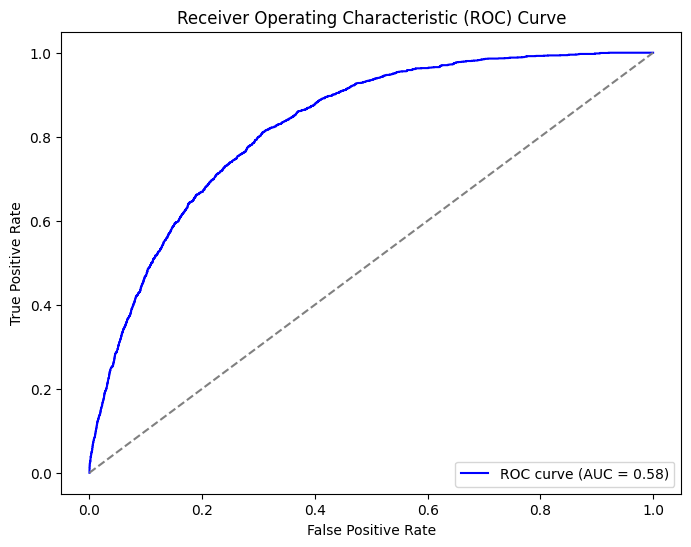

In [21]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_filtered_test)[:, 1])
roc_auc = roc_auc_score(y_test, rf_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Get feature importances from the trained RandomForestClassifier
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns.drop(['HbA1c_level', 'blood_glucose_level']),
    'Importance': importances
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the most and least important features
print(feature_importance)

                        Feature  Importance
4                           bmi    0.516224
1                           age    0.275586
2                  hypertension    0.041402
16                age_group_70+    0.028806
3                 heart_disease    0.019326
0                        gender    0.018109
15            age_group_[60,70)    0.014592
11            age_group_[20,30)    0.014374
8         smoking_history_never    0.011762
5       smoking_history_current    0.009503
7        smoking_history_former    0.009444
9   smoking_history_not current    0.007824
13            age_group_[40,50)    0.007443
10            age_group_[10,20)    0.007173
6          smoking_history_ever    0.007136
14            age_group_[50,60)    0.005852
12            age_group_[30,40)    0.005443


### Feature Importance Summary for Diabetes Prediction Model on Random Forests:

- Top Predictors:
  - BMI (0.516224): Strongest predictor by far in random forests
  - Age (0.275586): Distant second, importantly this time age as a "continuous variable" is the stronger predictor, not binned age groups


### Key Takeaways:
In the Random Forest classification model for diabetes prediction, BMI emerged as the most important feature by a wide margin (importance: 0.516), followed by age (0.276), with age performing better as a continuous variable than as binned categories. Other features such as hypertension (0.041), heart disease (0.019), and various age groups and smoking history indicators contributed minimally to the model’s predictions. The overall model achieved high accuracy (86%), but this figure is misleading due to the significant class imbalance and its poor performance on the positive class (diabetes cases). Specifically, the model yielded a recall of only 24% and a precision of 22% for the positive class, indicating a high false negative rate—a critical concern in a medical context where undiagnosed cases may lead to serious health risks. The ROC curve AUC of 0.58 further reflects limited discriminative ability, underscoring that while Random Forest captures dominant signals like BMI and age, it struggles to generalize well to identifying actual cases of diabetes.

## KNN
Lastly, we decided to try the KNN (K-Nearest Neighbors) model on our dataset. KNN is a conceptually simple algorithm, that classifies a data point by looking at the 'k' most similar instances to the data point (for example, with k=1, the KNN algorithm will only consider the most similar data point to the one it is trying to classify).

We tried KNN with two different values of k: 5, and 10; similar to logistic regression and random forests, we first trained, then generated a ROC curve and confusion matrix as well as a list of predictors sorted by importance to evaluate.

### KNN with 5 Neighbors

We first tested the KNN model with k=5.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model (k = 5)
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = "distance",
                                 metric = "euclidean")

# Fit the model on the training data
knn_model.fit(X_filtered, y_train)

# Make predictions on the test data
knn_predictions = knn_model.predict(X_filtered_test)

Accuracy: 0.8871554862194487


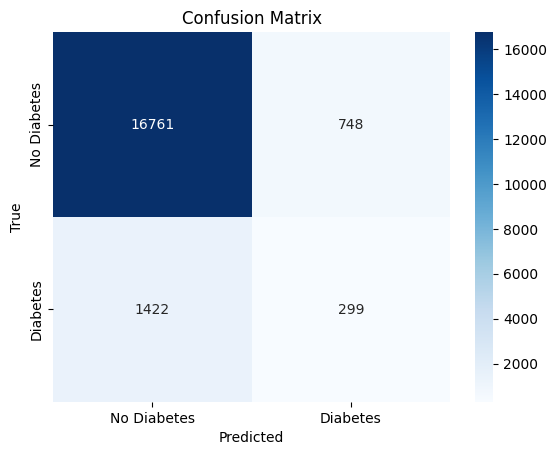

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     17509
           1       0.29      0.17      0.22      1721

    accuracy                           0.89     19230
   macro avg       0.60      0.57      0.58     19230
weighted avg       0.86      0.89      0.87     19230



In [24]:
# Accuracy
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes', 'Diabetes'],
    yticklabels=['No Diabetes', 'Diabetes']
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, knn_predictions)
print("Classification Report:\n", class_report)

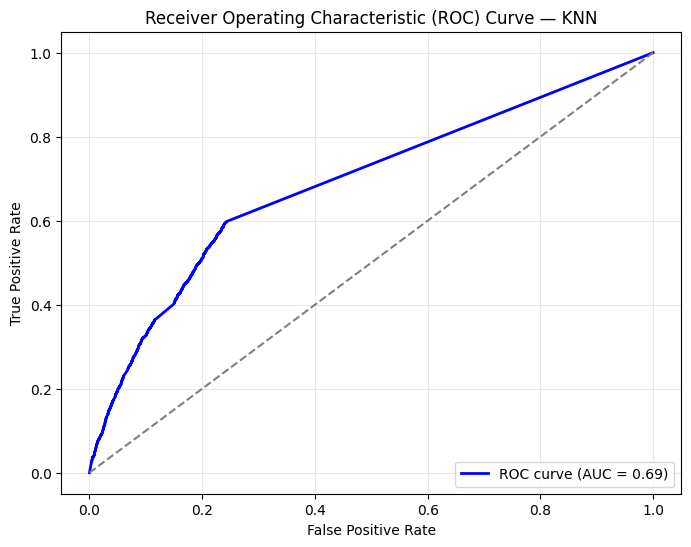

In [25]:
# ROC Curve
knn_prob = knn_model.predict_proba(X_filtered_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
roc_auc = roc_auc_score(y_test, knn_prob)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')       # random‑guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve — KNN')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra-Trees based on KNN to find importance faster
surrogate = ExtraTreesClassifier(n_estimators=200, random_state=42,n_jobs=-1,
    class_weight="balanced")

surrogate.fit(X_filtered, y_train)

imp_df = (pd.DataFrame({"Feature": X_filtered.columns,
                        "Importance": surrogate.feature_importances_})
            .sort_values("Importance", ascending=False))
print(imp_df.head(10))


              Feature  Importance
4                 bmi    0.540751
1                 age    0.215176
2        hypertension    0.046225
16      age_group_70+    0.032481
15  age_group_[60,70)    0.026411
11  age_group_[20,30)    0.023202
3       heart_disease    0.023021
0              gender    0.014653
14  age_group_[50,60)    0.013039
10  age_group_[10,20)    0.012659


### Feature Importance Summary for Diabetes Prediction Model on Logistic Regression:
- Top Predictors:
  - BMI (0.540751): again by far the strongest predictor
  - Age (0.215176): again, a distant second-strongest predictor

### Key Takeaways:
The K-Nearest Neighbors (KNN) model achieved an overall accuracy of 89%, outperforming logistic regression and random forests when blood sugar-related features were excluded. The model’s most influential predictors were BMI (importance: 0.541) and age (0.215), echoing the rankings observed in the random forest model. However, despite strong accuracy, the model exhibited low recall for diabetic cases (17%), leading to a high rate of false negatives—a concerning outcome in a medical context. The ROC curve AUC of 0.69 reflects moderate discriminative performance, better than random forests (AUC = 0.58) but weaker than logistic regression. Overall, while KNN captures key patterns in the data, its tendency to under-diagnose diabetic cases limits its practical utility as a standalone diagnostic tool.

### KNN with 10 neighbors

We then tried KNN with k=10.

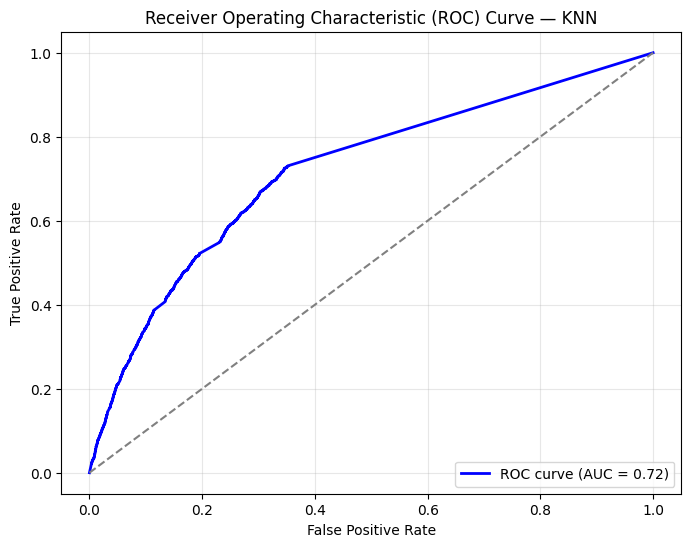

In [27]:
# Initialize KNN model (k = 10)
knn_model = KNeighborsClassifier(n_neighbors = 10, weights = "distance",
                                 metric = "euclidean")

# Fit the model on the training data
knn_model.fit(X_filtered, y_train)

# Make predictions on the test data
knn_predictions = knn_model.predict(X_filtered_test)

# ROC Curve
knn_prob = knn_model.predict_proba(X_filtered_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
roc_auc = roc_auc_score(y_test, knn_prob)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')       # random‑guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve — KNN')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Key Takeaways:
KNN improved slightly with a higher
k
k, but it's still underperforming compared to Random Forest and Logistic Regression. This suggests that KNN may not be the best choice for this dataset, possibly due to sensitivity to irrelevant features or lack of a strong distance metric in high-dimensional medical data.

## Project Value

Overall, it’s important to know which factors can help predict diabetes to not only expedite the diagnosis process, but also see which factors are controllable for people to be more aware of their relationship with the factors. Especially with our key takeaways, we hope that people will be more mindful of their habits, such as smoking and having a healthy lifestyle, that have a clear relationship with diabetes. In 2022, diabetes cost America $412.9 billion. Research shows that as diabetes becomes more severe, the cost of treating diabetes significantly increases as well. We hope that our findings and models can be improved upon to help diagnose diabetes earlier, to save lives and cut the financial burden on patients.